In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.ensemble import IsolationForest


In [9]:

df = pd.read_csv("Sample - Superstore.csv", encoding='ISO-8859-1')


print(df.columns.tolist())
df.head()


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [10]:

df['Order Date'] = pd.to_datetime(df['Order Date'])


df = df.dropna(subset=['Order Date', 'Sales'])


df.set_index('Order Date', inplace=True)


C:\Users\bisht\AppData\Local\Temp\ipykernel_18852\115914090.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df['Sales'].resample('M').sum()
C:\Users\bisht\AppData\Local\Temp\ipykernel_18852\115914090.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


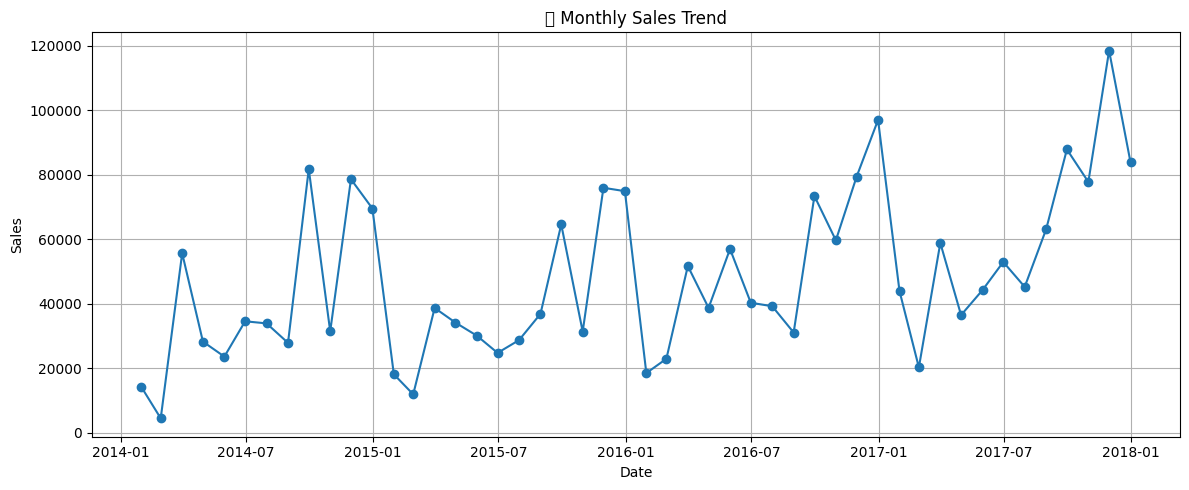

In [11]:

monthly_sales = df['Sales'].resample('M').sum()


plt.figure(figsize=(12,5))
plt.plot(monthly_sales, marker='o')
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\bisht\AppData\Local\Temp\ipykernel_18852\2810249212.py:4: UserWarning: Glyph 129668 (\N{MAGIC WAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129668 (\N{MAGIC WAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


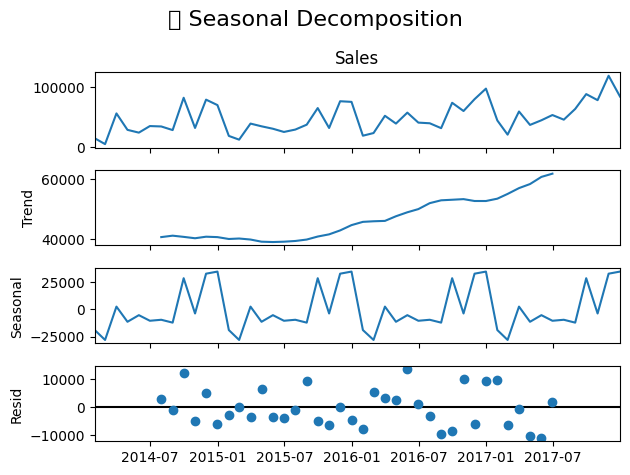

In [12]:

decomposition = seasonal_decompose(monthly_sales, model='additive', period=12)
decomposition.plot()
plt.suptitle("🪄 Seasonal Decomposition", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\bisht\AppData\Local\Temp\ipykernel_18852\484626388.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


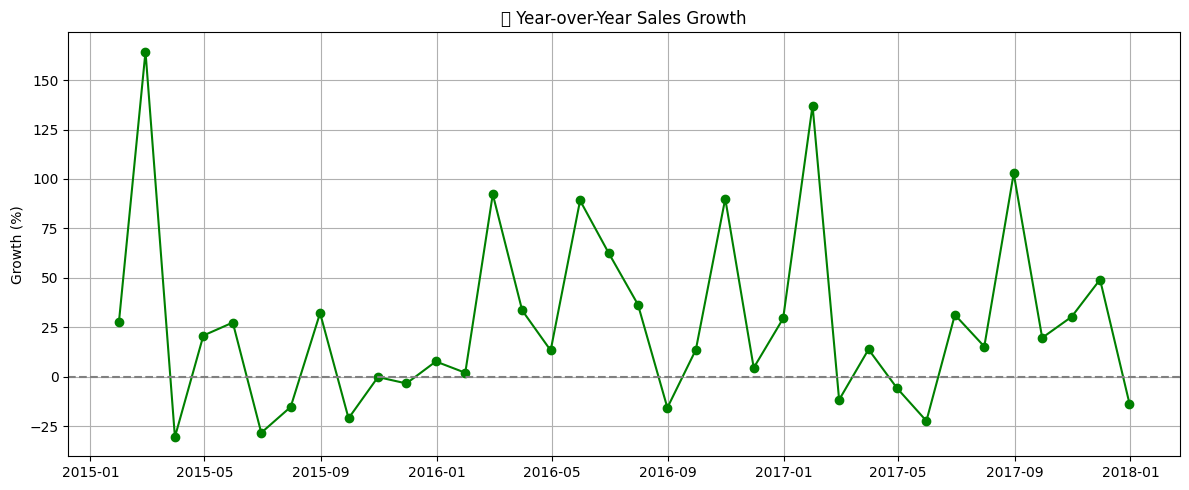

In [13]:

monthly_df = monthly_sales.to_frame(name='TotalSales')
monthly_df['YoY (%)'] = monthly_df['TotalSales'].pct_change(12) * 100


plt.figure(figsize=(12,5))
plt.plot(monthly_df['YoY (%)'], marker='o', color='green')
plt.axhline(0, linestyle='--', color='gray')
plt.title("📊 Year-over-Year Sales Growth")
plt.ylabel("Growth (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\bisht\AppData\Local\Temp\ipykernel_18852\3400692066.py:16: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\bisht\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


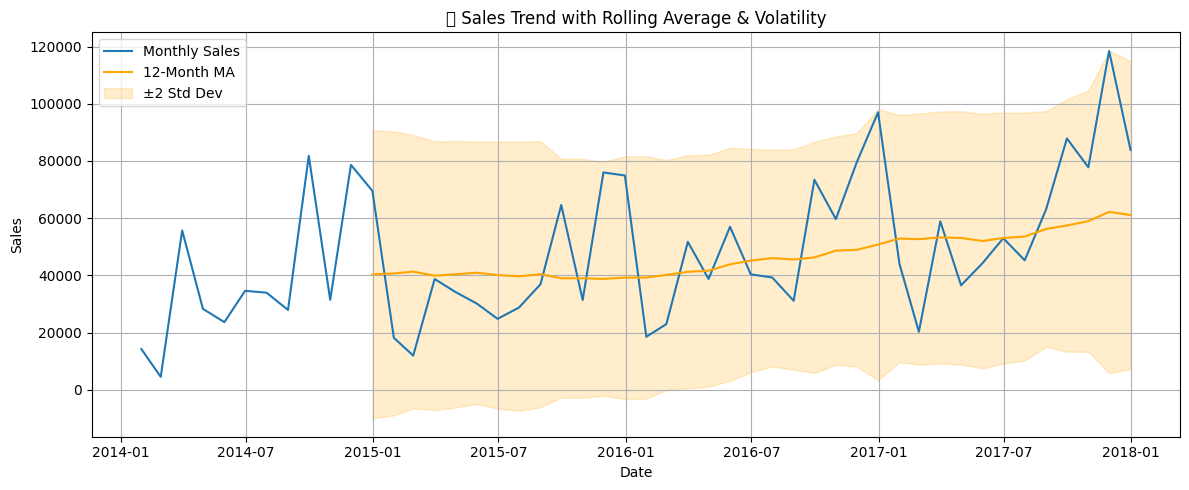

In [14]:

rolling = monthly_df['TotalSales'].rolling(window=12)


plt.figure(figsize=(12,5))
plt.plot(monthly_df['TotalSales'], label='Monthly Sales')
plt.plot(rolling.mean(), label='12-Month MA', color='orange')
plt.fill_between(monthly_df.index,
                 rolling.mean() - 2*rolling.std(),
                 rolling.mean() + 2*rolling.std(),
                 alpha=0.2, color='orange', label='±2 Std Dev')
plt.title("📈 Sales Trend with Rolling Average & Volatility")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


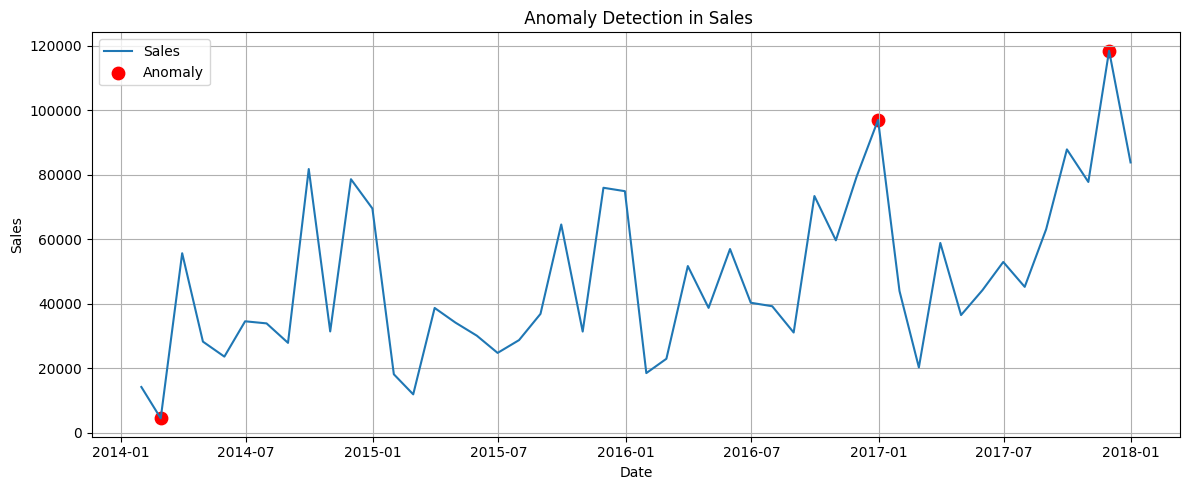

In [16]:

iso = IsolationForest(contamination=0.05, random_state=42)
monthly_df['Anomaly'] = iso.fit_predict(monthly_df[['TotalSales']])


anomalies = monthly_df[monthly_df['Anomaly'] == -1]


plt.figure(figsize=(12,5))
plt.plot(monthly_df['TotalSales'], label='Sales')
plt.scatter(anomalies.index, anomalies['TotalSales'], color='red', label='Anomaly', s=80)
plt.title(" Anomaly Detection in Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Summary:
#- Sales trend increases over time with some fluctuations.
#- Seasonal spikes observed around certain months.
#- Positive YoY growth in several periods.
#- Detected anomalies may be due to promotions, large orders, or errors.
